In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pickle

In [40]:
df = pd.read_csv('kinase_ranked_1.csv')
df

,Uniprot Primary Accession,Protein,Phosphosite,SITE_+/-7_AA,ranked_1
0,A0A0B4J1R7,A0A0B4J1R7,T6,__MMATGTPESQARF,AAK1
1,A0A1B0GUI2,A0A1B0GUI2,T185,KTPTLQPTPEVHNGL,AAK1
2,A0A1B0GUI2,A0A1B0GUI2,T763,RRLSSASTGKPPLSV,AAK1
3,A6H8Y1,BDP1,T2081,EKVKENATPTRNTIS,AAK1
4,A6NC98,CC88B,T1366,EGREADGTGSPSPAP,AAK1
...,...,...,...,...,...
92562,Q9Y2L6,FRM4B,T529,NEPDLCKTVKKKRKQ,ZAK
92563,Q9Y3C1,NOP16,S16,RRQKFGYSVNRKRLN,ZAK
92564,Q9Y4H2,IRS2,S30,NNNNNNHSVRKCGYL,ZAK
92565,Q9Y5Y5,PEX16,S183,RTLQNTPSLHSRHWG,ZAK


In [41]:
len(df)

92567

In [42]:
# show all rows 
# pd.set_option('display.max_rows', None)

In [43]:
df['length_of_sequence'] = df['SITE_+/-7_AA'].apply(lambda x: len(x))
df

,Uniprot Primary Accession,Protein,Phosphosite,SITE_+/-7_AA,ranked_1,length_of_sequence
0,A0A0B4J1R7,A0A0B4J1R7,T6,__MMATGTPESQARF,AAK1,15
1,A0A1B0GUI2,A0A1B0GUI2,T185,KTPTLQPTPEVHNGL,AAK1,15
2,A0A1B0GUI2,A0A1B0GUI2,T763,RRLSSASTGKPPLSV,AAK1,15
3,A6H8Y1,BDP1,T2081,EKVKENATPTRNTIS,AAK1,15
4,A6NC98,CC88B,T1366,EGREADGTGSPSPAP,AAK1,15
...,...,...,...,...,...,...
92562,Q9Y2L6,FRM4B,T529,NEPDLCKTVKKKRKQ,ZAK,15
92563,Q9Y3C1,NOP16,S16,RRQKFGYSVNRKRLN,ZAK,15
92564,Q9Y4H2,IRS2,S30,NNNNNNHSVRKCGYL,ZAK,15
92565,Q9Y5Y5,PEX16,S183,RTLQNTPSLHSRHWG,ZAK,15


In [44]:
df = df[~df['SITE_+/-7_AA'].apply(lambda x: '_' in x)]

In [45]:
df['length_of_sequence'].value_counts()

15    89635
Name: length_of_sequence, dtype: int64

In [46]:
df[['ranked_1', 'SITE_+/-7_AA']].head()

,ranked_1,SITE_+/-7_AA
1,AAK1,KTPTLQPTPEVHNGL
2,AAK1,RRLSSASTGKPPLSV
3,AAK1,EKVKENATPTRNTIS
4,AAK1,EGREADGTGSPSPAP
5,AAK1,EQVANGPTPPPRRQL


In [47]:
df['ranked_1'].nunique()

303

In [48]:
# !pip install logomaker 

In [49]:
df.groupby('ranked_1')['SITE_+/-7_AA'].apply(list)

ranked_1
AAK1      [KTPTLQPTPEVHNGL, RRLSSASTGKPPLSV, EKVKENATPTR...
ACVR2A    [NSDIEQSSDSKVKNL, HPKLGDVTDADSEAD, RPTLDDSSEEE...
ACVR2B    [MSRLQDISELLATGA, MDDLDDDSDSADDAT, YGENDENTDDK...
AKT1      [KKERRRNSINRNFVG, KKHRRRPSKKKRHWK, RTRSRRLTFRK...
AKT2      [KHTRRKESHAARRHQ, MARQRRASLSCGGPG, KKHRRRPSKKK...
                                ...                        
YANK2     [GEARRGGTMETDDHM, IHRAILGSVERMIAI, PPKFVFGSESV...
YANK3     [RLGQRLPSIVVEPSE, SPINLRRSIEEALCS, SPGIRRGSENS...
YSK1      [PPKPLPGTLKRRRPP, QLGTGRGTLRLRSRG, ADFSAVGTIGR...
YSK4      [DDQPDSSSLKSRGSV, APSPGEASLRLQAHS, PPGHDQDSLKK...
ZAK       [PGQYSGNSFKKGDSN, EPREHGHSYSNRKYE, IPGSPGHTIYA...
Name: SITE_+/-7_AA, Length: 303, dtype: object

In [50]:
kinase_list = df.groupby('ranked_1')['SITE_+/-7_AA'].apply(list).to_dict()
kinase_list

{'AAK1': ['KTPTLQPTPEVHNGL',
  'RRLSSASTGKPPLSV',
  'EKVKENATPTRNTIS',
  'EGREADGTGSPSPAP',
  'EQVANGPTPPPRRQL',
  'QNSNSQSTPGSSGQR',
  'KDLLFQKSPQNHRPP',
  'VETFANKSGQSALYD',
  'VILGLLKTPAQYDAS',
  'KDLLFQKSPQNHRPP',
  'SAGPNSPTGGGGGGG',
  'QNSNSQSTPGSSGQR',
  'SVIIADQTPTPTRFL',
  'IELAKEWTPAGKAKQ',
  'GSVVPGSSGVGTPRQ',
  'KSITILSTPEGTSAA',
  'EPTPAQKTPAKVVYV',
  'QNTRLQPTPPIPAPA',
  'SPVEAEGTPEPGAEA',
  'FSTQGTPSGSPFPSQ',
  'ASVAQSRSGPLSPAA',
  'HVTTAEGTPGTTDQE',
  'RALPSLNTGSSSPRG',
  'NDVLAVNTPKDAAQQ',
  'SPRTLSPTPSAEGYQ',
  'SEVSGSGSGNFGEEG',
  'RSVAEQHTPVCSRFS',
  'DLLAALPTPPHNQTE',
  'ESSPQHPTPPARPRH',
  'AAPEPERTPVGQGSW',
  'FQRVLESTPNNGYLY',
  'AVIKEWGTGRDTLRC',
  'SSRLENTTPTQPLTP',
  'LARTPSPTPQPTSPQ',
  'PAPSAQPTPPSASVP',
  'LSQAASPTGASRSVR',
  'SSSSSSGTPASQLYP',
  'LSVRLGPSGSAQCLS',
  'VSQISVLSGGKAKCS',
  'VVLGKDASGQPIFNA',
  'PVPETTPTPPTKTGT',
  'MASRKEGTGSTATSS',
  'RTQTESSTPPGIPGG',
  'VYSAPRSTGPGASLG',
  'QVVGRAGTGVDNVDL',
  'NSLLSKKTGSPGSPG',
  'PPPQPQHTPSPAAPP',
  'PY

In [51]:
{k: len(v) for k, v in kinase_list.items()}

{'AAK1': 743,
 'ACVR2A': 145,
 'ACVR2B': 151,
 'AKT1': 16,
 'AKT2': 19,
 'AKT3': 23,
 'ALK2': 171,
 'ALK4': 565,
 'ALPHAK3': 1094,
 'AMPKA1': 83,
 'AMPKA2': 91,
 'ANKRD3': 242,
 'ASK1': 405,
 'ATM': 441,
 'ATR': 554,
 'AURA': 308,
 'AURB': 58,
 'AURC': 199,
 'BCKDK': 575,
 'BIKE': 669,
 'BMPR1A': 95,
 'BMPR1B': 151,
 'BMPR2': 346,
 'BRAF': 552,
 'BRSK1': 133,
 'BRSK2': 138,
 'BUB1': 753,
 'CAMK1A': 36,
 'CAMK1B': 39,
 'CAMK1D': 26,
 'CAMK1G': 52,
 'CAMK2A': 137,
 'CAMK2B': 240,
 'CAMK2D': 310,
 'CAMK2G': 754,
 'CAMK4': 87,
 'CAMKK1': 590,
 'CAMKK2': 567,
 'CAMLCK': 41,
 'CDC7': 1305,
 'CDK1': 173,
 'CDK10': 211,
 'CDK12': 114,
 'CDK13': 368,
 'CDK14': 360,
 'CDK16': 518,
 'CDK17': 217,
 'CDK18': 189,
 'CDK19': 232,
 'CDK2': 1119,
 'CDK3': 363,
 'CDK4': 178,
 'CDK5': 190,
 'CDK6': 203,
 'CDK7': 486,
 'CDK8': 381,
 'CDK9': 416,
 'CDKL1': 126,
 'CDKL5': 253,
 'CHAK1': 390,
 'CHAK2': 954,
 'CHK1': 496,
 'CHK2': 61,
 'CK1A': 456,
 'CK1A2': 299,
 'CK1D': 763,
 'CK1E': 575,
 'CK1G1': 551,
 'C

In [52]:
need_family = ["ATR", "WNK3", "DNAPK", "NEK11", "PRP4","PKCD"]

In [53]:
{k: len(v) for k, v in kinase_list.items() if k in need_family}

{'ATR': 554, 'DNAPK': 599, 'NEK11': 117, 'PKCD': 60, 'PRP4': 1080, 'WNK3': 317}

In [31]:
df.columns

Index(['Uniprot Primary Accession', 'Protein', 'Phosphosite', 'SITE_+/-7_AA',
       'ranked_1', 'length_of_sequence'],
      dtype='object')

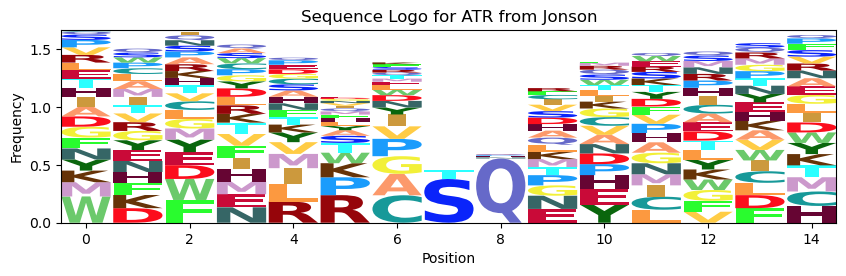

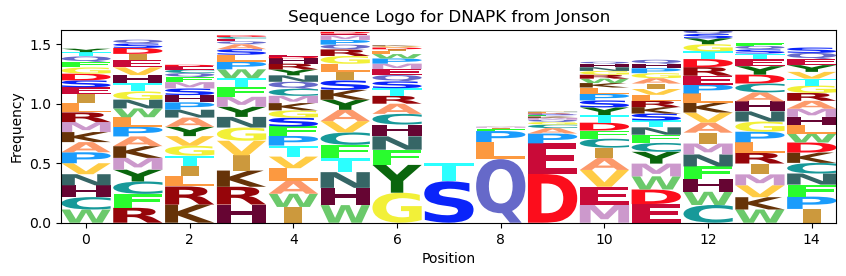

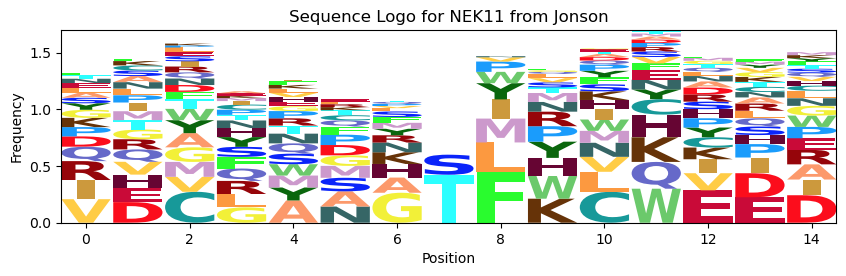

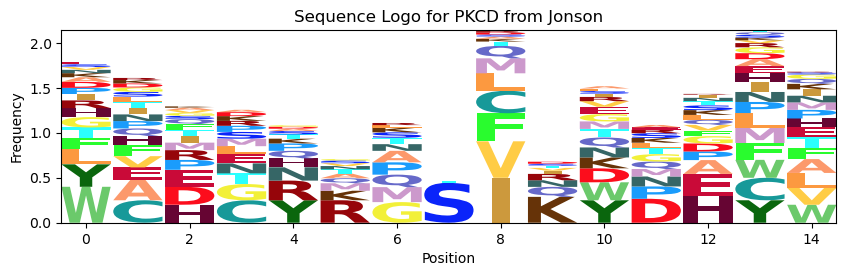

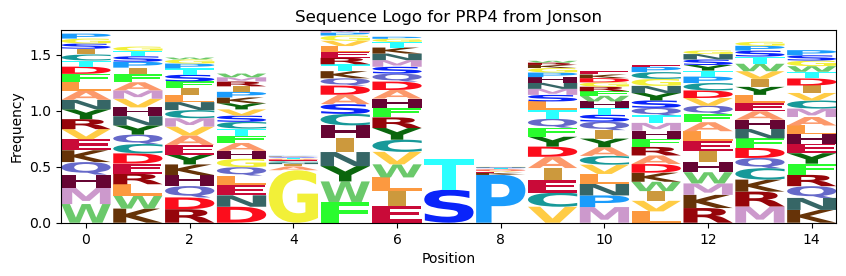

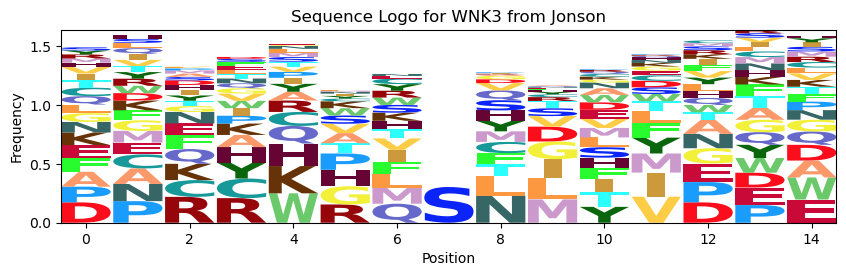

In [55]:
import logomaker
from collections import Counter

# # Group by 'KINASE rank_1' and combine all sequences into a list
kinase_sequences = df.groupby('ranked_1')['SITE_+/-7_AA'].apply(list)

# # Initialize an empty dictionary to store the Logos for each kinase
kinase_logos = {}

# # For each kinase, create a position frequency matrix and then a sequence logo
for kinase, sequences in kinase_sequences.items():
    if kinase not in need_family:
        continue
#     # Combine sequences into a single string for each position
    aligned_sequences = [''.join(seq) for seq in zip(*sequences)]
    
#     # Create a DataFrame where each row corresponds to one position
    position_df = pd.DataFrame([Counter(pos) for pos in aligned_sequences]).fillna(0)
    
#     # Normalize the counts to get frequencies
    position_freq_matrix = position_df.div(position_df.sum(axis=0), axis=1)
    
#     # Create the sequence logo
    logo = logomaker.Logo(position_freq_matrix, color_scheme='skylign_protein', stack_order='small_on_top')
    
#     # Set title and axis labels
    logo.ax.set_title(f'Sequence Logo for {kinase} from Jonson')
    logo.ax.set_xlabel('Position')
    logo.ax.set_ylabel('Frequency')
    
#     # Store the logo in the dictionary
    kinase_logos[kinase] = logo
# Display the logo
plt.show()
    
